# Hit Song Predictions

[Bhavyaa Sharma](https://medium.com/@sharmabhavyaa.dav)

In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=d696a0042d73dfbaf8cf7aae8fa86f6c45a864136a9de81b3a03c028efbf8085
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## Import modules and datasets

In [32]:
from tensorflow.keras.models import load_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import os

np.random.seed(21)

In [4]:
!wget https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/dataset-of-90s.csv

--2021-09-03 21:23:37--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/dataset-of-90s.csv
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.66.96
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.66.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 856926 (837K) [text/csv]
Saving to: ‘dataset-of-90s.csv’

dataset-of-90s.csv  100%[===================>] 836.84K   572KB/s    in 1.5s    

2021-09-03 21:23:39 (572 KB/s) - ‘dataset-of-90s.csv’ saved [856926/856926]



In [5]:
url = "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/dataset-of-90s.csv"
df = pd.read_csv(url)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


## Data Preprocssing

In [6]:
df.target.value_counts()

1    2760
0    2760
Name: target, dtype: int64

In [7]:
df = df.sample(frac=1)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
3032,You're Beginning To Get To Me,Clay Walker,spotify:track:0cwJIOwflRPDTcmz2ApX0B,0.536,0.582,4,-6.589,1,0.0397,0.184000,0.000000,0.109,0.491,83.238,161533,4,35.81174,8,1
275,Don't Treat Me Bad,Firehouse,spotify:track:4lbhQdbiTpNP7GowZG8KsM,0.616,0.807,8,-11.400,1,0.0348,0.000303,0.000024,0.193,0.637,111.054,235360,4,39.61848,10,1
2089,Canta Conmigo Rock And Roll,Lone Star,spotify:track:3prKtJWwLZp47Q99RqDbb9,0.473,0.724,1,-14.215,1,0.1070,0.000076,0.036500,0.785,0.532,87.201,261173,4,152.77602,7,0
4287,Everything About You,Ugly Kid Joe,spotify:track:1O2ACd0zg4GYgQRhLBGYDV,0.501,0.803,1,-8.449,1,0.0547,0.008810,0.000002,0.107,0.738,122.458,255160,4,35.68415,8,1
5310,Blackman Know Yourself,Femi Kuti,spotify:track:0lKvlc8fsccGK3yQXlogl0,0.756,0.915,10,-7.097,0,0.0744,0.028500,0.000014,0.127,0.948,104.876,319160,4,30.44362,12,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5520 entries, 3032 to 5327
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5520 non-null   object 
 1   artist            5520 non-null   object 
 2   uri               5520 non-null   object 
 3   danceability      5520 non-null   float64
 4   energy            5520 non-null   float64
 5   key               5520 non-null   int64  
 6   loudness          5520 non-null   float64
 7   mode              5520 non-null   int64  
 8   speechiness       5520 non-null   float64
 9   acousticness      5520 non-null   float64
 10  instrumentalness  5520 non-null   float64
 11  liveness          5520 non-null   float64
 12  valence           5520 non-null   float64
 13  tempo             5520 non-null   float64
 14  duration_ms       5520 non-null   int64  
 15  time_signature    5520 non-null   int64  
 16  chorus_hit        5520 non-null   float

In [9]:
# This is useless in this case, so just drop it
df.drop(['track', 'artist', 'uri'], axis=1, inplace=True)

In [10]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.00000,5520.000000,5520.000000,5520.000000,5520.000000,5.520000e+03,5520.000000,5520.000000,5520.000000,5520.000000
mean,0.566893,0.602246,5.263043,-10.235112,0.669565,0.073996,0.29122,0.159886,0.197202,0.537685,118.840424,2.562110e+05,3.922464,40.999358,11.128261,0.500000
std,0.180373,0.252189,3.511379,5.117146,0.470412,0.081979,0.32463,0.304407,0.174573,0.257688,29.489480,1.034398e+05,0.352768,19.941630,4.485026,0.500045
min,0.057600,0.000357,0.000000,-49.253000,0.000000,0.022000,0.00000,0.000000,0.013000,0.000000,34.535000,1.953300e+04,1.000000,0.000000,1.000000,0.000000
25%,0.451000,0.435000,2.000000,-12.207250,0.000000,0.033100,0.01800,0.000000,0.089675,0.330000,96.422000,2.027532e+05,4.000000,28.065100,9.000000,0.000000
50%,0.586000,0.634500,5.000000,-9.091000,1.000000,0.043200,0.14000,0.000228,0.127000,0.556000,114.959000,2.467200e+05,4.000000,36.512680,11.000000,0.500000
75%,0.699000,0.811000,8.000000,-6.893750,1.000000,0.072825,0.52725,0.091375,0.259000,0.751000,135.988000,2.899070e+05,4.000000,48.628155,13.000000,1.000000
max,0.979000,0.998000,11.000000,-1.169000,1.000000,0.950000,0.99600,0.997000,0.992000,0.996000,217.943000,1.711800e+06,5.000000,235.060740,69.000000,1.000000


In [11]:
df.iloc[:0:-1].head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
5327,0.206,0.968,7,-7.691,1,0.3070,0.000174,0.157000,0.485,0.0982,201.584,124413,5,22.52213,5,0
772,0.431,0.751,0,-5.124,1,0.0423,0.013400,0.000004,0.126,0.7770,171.848,235360,4,69.74034,10,1
48,0.319,0.967,3,-6.067,1,0.1220,0.124000,0.000000,0.124,0.7140,108.664,113827,4,82.77861,3,0
1144,0.648,0.285,4,-11.986,1,0.0343,0.498000,0.000004,0.222,0.2120,137.033,243440,4,19.12797,12,1
4706,0.601,0.807,2,-8.294,1,0.0393,0.032600,0.000114,0.318,0.4720,126.075,297987,4,38.31475,11,1


In [12]:
df.iloc[:,[-1]].head()

,target
3032,1
275,1
2089,0
4287,1
5310,0


In [13]:
unscaled_input = df.iloc[:0:-1]
target = df.iloc[:,[-1]]

In [14]:
scaled_input = preprocessing.scale(unscaled_input)
scaled_input

array([[-2.00085043,  1.45030048,  0.49460572, ..., -0.92661843,
        -1.36656922, -0.99981882],
       [-0.75343281,  0.58983498, -1.49893656, ...,  1.44121711,
        -0.25169922,  1.00018121],
       [-1.37436958,  1.4463352 , -0.6445613 , ...,  2.09504281,
        -1.81251722, -0.99981882],
       ...,
       [-0.36534733,  0.79602948, -1.21414481, ..., -0.26658709,
        -0.69764722,  1.00018121],
       [-0.52058152,  0.48277245, -1.21414481, ...,  5.60517916,
        -0.92062122, -0.99981882],
       [ 0.27222168,  0.81189059,  0.77939748, ..., -0.06929358,
        -0.25169922,  1.00018121]])

In [15]:
samples_count = scaled_input.shape[0]
samples_count

5519

In [16]:
train_samples_count = int(0.8 * samples_count )
validation_samples_count = int(0.1 * samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

In [17]:
# Train
train_inputs = scaled_input[:train_samples_count]
train_targets = target[:train_samples_count]

In [18]:
# Validation
validation_inputs = scaled_input[train_samples_count : train_samples_count + validation_samples_count]
validation_targets = target[train_samples_count : train_samples_count + validation_samples_count]

In [20]:
# Test
test_inputs = scaled_input[train_samples_count + validation_samples_count:]
test_targets = target[train_samples_count + validation_samples_count:]

In [21]:
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

target    2224
dtype: int64 4415 target    0.503737
dtype: float64
target    262
dtype: int64 551 target    0.475499
dtype: float64
target    274
dtype: int64 553 target    0.495479
dtype: float64


## Saving preprocessing data

In [22]:
np.savez('Spotify_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Spotify_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Spotify_data_test', inputs=test_inputs, targets=test_targets)

In [23]:
npz = np.load("Spotify_data_train.npz")
train_inputs, train_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load("Spotify_data_validation.npz")
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load("Spotify_data_test.npz")
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

## Model

In [47]:
input_size = 15
hidden_layer_size = 50
model = tf.keras.Sequential([
          tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
          tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
          tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
          tf.keras.layers.Dense(2, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
batch_size = 200
max_epochs = 50

history = model.fit(train_inputs, train_targets,
                    batch_size=batch_size, epochs=max_epochs,
                    validation_data=(validation_inputs, validation_targets),
                    verbose=2)

Epoch 1/50
23/23 - 25s - loss: 0.6966 - accuracy: 0.5024 - val_loss: 0.6949 - val_accuracy: 0.4646
Epoch 2/50
23/23 - 0s - loss: 0.6927 - accuracy: 0.5096 - val_loss: 0.6947 - val_accuracy: 0.4628
Epoch 3/50
23/23 - 0s - loss: 0.6918 - accuracy: 0.5153 - val_loss: 0.6939 - val_accuracy: 0.5082
Epoch 4/50
23/23 - 0s - loss: 0.6910 - accuracy: 0.5166 - val_loss: 0.6950 - val_accuracy: 0.4918
Epoch 5/50
23/23 - 0s - loss: 0.6903 - accuracy: 0.5189 - val_loss: 0.6946 - val_accuracy: 0.5082
Epoch 6/50
23/23 - 0s - loss: 0.6886 - accuracy: 0.5293 - val_loss: 0.6950 - val_accuracy: 0.4973
Epoch 7/50
23/23 - 0s - loss: 0.6888 - accuracy: 0.5366 - val_loss: 0.6948 - val_accuracy: 0.4973
Epoch 8/50
23/23 - 0s - loss: 0.6870 - accuracy: 0.5343 - val_loss: 0.6926 - val_accuracy: 0.4991
Epoch 9/50
23/23 - 0s - loss: 0.6861 - accuracy: 0.5456 - val_loss: 0.6945 - val_accuracy: 0.4991
Epoch 10/50
23/23 - 0s - loss: 0.6841 - accuracy: 0.5563 - val_loss: 0.6947 - val_accuracy: 0.4846
Epoch 11/50
23/23 

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                850       
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 102       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 3         
Total params: 6,055
Trainable params: 6,055
Non-trainable params: 0
_________________________________________________________________


## Saving the model

In [51]:
model.save("song.h5")

In [52]:
model = load_model("song.h5")

## Analysis

Text(0, 0.5, 'Loss')

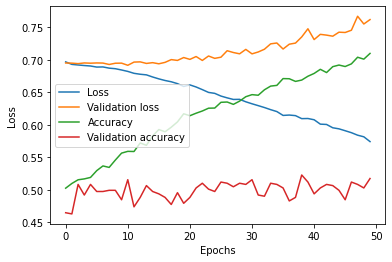

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Loss', 'Validation loss', 'Accuracy', 'Validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [55]:
pred = model.predict(test_inputs)

In [57]:
for i in pred:
  if i >= 0.6:
    print("Hit")
  else:
    print("Not hit")

Hit
Not hit
Hit
Not hit
Hit
Hit
Not hit
Not hit
Not hit
Not hit
Hit
Hit
Hit
Not hit
Hit
Not hit
Not hit
Not hit
Not hit
Hit
Hit
Hit
Not hit
Hit
Not hit
Not hit
Not hit
Not hit
Hit
Hit
Hit
Not hit
Hit
Hit
Not hit
Hit
Hit
Hit
Not hit
Not hit
Not hit
Not hit
Not hit
Not hit
Not hit
Hit
Not hit
Hit
Not hit
Hit
Not hit
Not hit
Hit
Not hit
Not hit
Not hit
Not hit
Hit
Hit
Not hit
Not hit
Not hit
Not hit
Not hit
Hit
Not hit
Not hit
Hit
Hit
Hit
Hit
Not hit
Not hit
Not hit
Hit
Not hit
Hit
Hit
Hit
Hit
Not hit
Not hit
Hit
Hit
Not hit
Hit
Hit
Hit
Not hit
Hit
Hit
Not hit
Hit
Not hit
Not hit
Not hit
Not hit
Hit
Hit
Not hit
Hit
Hit
Hit
Not hit
Hit
Not hit
Not hit
Not hit
Not hit
Hit
Not hit
Not hit
Not hit
Hit
Not hit
Hit
Not hit
Hit
Hit
Not hit
Hit
Not hit
Not hit
Hit
Hit
Not hit
Hit
Not hit
Not hit
Hit
Not hit
Not hit
Not hit
Hit
Hit
Hit
Not hit
Not hit
Hit
Not hit
Not hit
Not hit
Hit
Hit
Hit
Not hit
Not hit
Not hit
Hit
Not hit
Not hit
Hit
Hit
Hit
Not hit
Not hit
Hit
Hit
Hit
Not hit
Hit
Not hit
Not 

# Evaluations

In [66]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets[:-1], verbose=0)
print("Test loss: {0:.2f}\nTest accuracy: {1:.2f}".format(test_loss, test_accuracy))

Test loss: 0.76
Test accuracy: 0.54
